# 01: MNIST Dataset Exploration
The goal of this notebook is the exploration of the MNIST dataset. I want to take a look at both the traditional "Number" MNIST dataset and the new "Fashion" MNIST dataset. Furthermore, applying deep learning to these datasets makes a lot of sense since the data is unstructured and we need to learn a representation or new features. With these new features encoded in matrices we can then train our neural network and make new predictions.

## Number MNIST
First, we need to add some imports to train our neural networks, visualize images and results or create some deeper analysis. Tensorflow is one of the most popular deep learning frameworks that are currently available. On September 30th 2019 Google released the official Tensorflow 2.0 version. We are going to use the wrapper Keras which makes it a little easier to implement small deep neural networks.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow import keras

#### Preprocessing
To load the training and testing data we can use the predifined Keras wrapper for the MNIST dataset. The dataset consist of 60000 images that depict numbers from 0 to 9. Each image has a size of 28 by 28 pixels and does not contain any color information. The digits are handwritten and are not from a single person. That means that we have digits that show the same number but might look different because different people write numbers in different ways. Therefore our neural network must be able to generalize well and recognize key characteristics of each digit.

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255
test_images = test_images / 255

#### Visualizations
As you can see in the pictures, some of the numbers tend to have a thicker stroke or they might be slightly rotated. Furthermore, there are completely different types of some numbers. A good example is the number 1 and 2 which might have an additional loop or tick. However, all in all it is fairly easy to differentiate all the different numbers. 

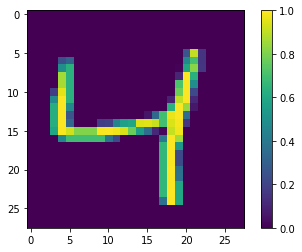

This image shows the number 4


In [3]:
plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.show()
print("This image shows the number", train_labels[2])

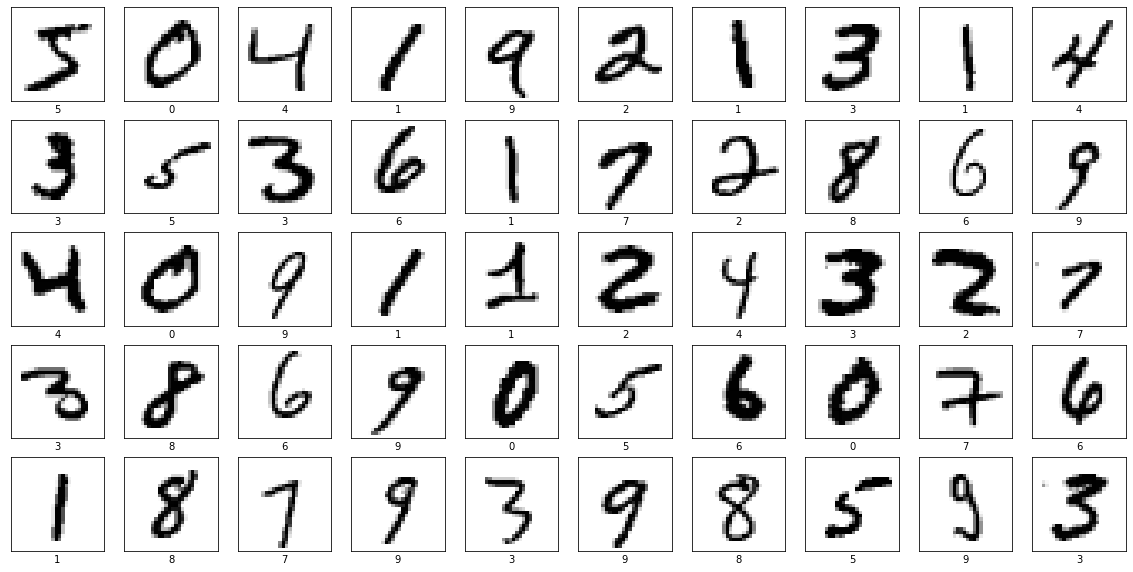

In [4]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#### Neural Network
We are going to use the same neural network architecture for both datasets. This will allow us to see if one dataset can be handled easier. For the "Number" MNIST dataset we achieved a 99.47% accuracy on the training set and a 98.77% accuracy on the training set. This basiically means that our neural network solved the task of recognizing digits. Even humans might have trouble to get to this accuracy of recognizing digits. If you compare these results with the "Fashion" MNIST dataset, you will see that it is way harder to predict the fashion item. This is mainly because the fashion items have a higher complexity and tend to look the same although they belong to different categories.

In [9]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))
train_labels_categorical = to_categorical(train_labels)
test_labels_categorical = to_categorical(test_labels)

model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,train_labels_categorical,epochs=4,batch_size=128)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 40s 663us/sample - loss: 0.1518 - accuracy: 0.9541
Epoch 2/4
60000/60000 [==============================] - 39s 656us/sample - loss: 0.0420 - accuracy: 0.9869
Epoch 3/4
60000/60000 [==============================] - 40s 661us/sample - loss: 0.0255 - accuracy: 0.9916
Epoch 4/4
60000/60000 [==============================] - 39s 657us/sample - loss: 0.0169 - accuracy: 0.9947


In [11]:
test_loss, test_acc = model.evaluate(test_images,test_labels_categorical, batch_size=64, verbose=0)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.0412243378631887

Test accuracy: 0.9877


#### Analysis
Now let's take a look at the misclassifications our neural network produces. We can do this by using pandas and matplotlib. First, we predict the labels for the test images and then count the misclassifications using pandas. Finally, we plot the results in a bar chart to understand which digits are harder to detect compared to others. Wel also plotted some of the digits that the neural network predicted wrong.

Figure shows number of misclassifications per digit category


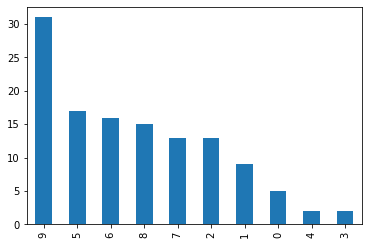

In [12]:
predicted_labels = model.predict(test_images)
predictions = np.argmax(predicted_labels, axis = 1)
results = pd.DataFrame()
results["predicted_label"] = predictions
results["actual_label"] = test_labels
results["index"] = range(0,10000)
misclassifications = results.loc[results["predicted_label"] != results["actual_label"]]
actual_counts = misclassifications["actual_label"].value_counts()
actual_counts.plot.bar()
print("Figure shows number of misclassifications per digit category")

In [13]:
misclassifications.head(10)

,predicted_label,actual_label,index
221,3,2,221
321,7,2,321
340,3,5,340
359,4,9,359
445,0,6,445
582,2,8,582
645,3,5,645
659,1,2,659
674,3,5,674
684,2,7,684


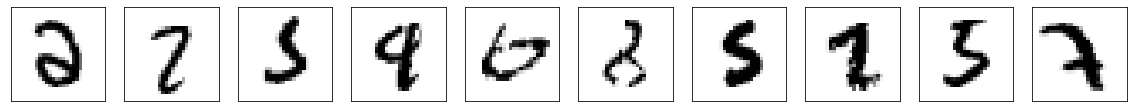

In [14]:
plt.figure(figsize=(20,10))
indexes = [221, 321, 340, 359, 445, 582, 645, 659, 674, 684]
count = 1
for i in indexes:
    plt.subplot(1,10,count)
    count += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape((28,28)),cmap=plt.cm.binary)
plt.show()

## Fashion MNIST
Here again we need some imports from tensorflow and keras to be able to train our networks. You can find all Keras API provided datasets at https://keras.io/datasets/. The Fashion MNIST dataset has been created by Zalando and they aim to replace the original Number dataset. In fact, the original Number MNIST dataset seems to be too easy. In addition, researchers say that the dataset makes no general statement about the performance of a CV algorithm because in certain cases you only need to have one pixel to recognize which number it is. To replace the old MNIST dataset the researchers created this new dataset with fashion articles. However, the shape of the input and output dimension is the same.

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras

#### Preprocessing
First, we need to load the dataset. Luckily, the Keras API provides us with a data loader for the fashion MNIST dataset as well. The dataset comes in two separate sets for training the neural network and testing its performance. Just like the number MNIST dataset this dataset also has 10 different labels/classes. To feed the images into our neural networks it makes sense to normalize the data. We do this by scaling all the values to the range between 0 and 1.0. 

In [16]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [17]:
class_names = ['Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [18]:
train_images = train_images / 255
test_images = test_images / 255

#### Visualizations
First, we want to take a look at a single image and see how the grayscaled images look like. To visualize the raw data we take teh first image from our training set and feed it to a pyplot of matplotlib. The first image obviosly shows an ankle boot. 

Secondly, we want to take a look at multiple images and see what characteristics they show. As you can see in the second figure below there are many different fashion articles. Some of them look pretty similar and even with the human eye you sometimes cannot classify an fashion article to the right category.

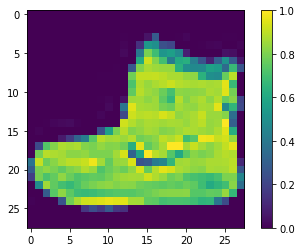

This image shows: Ankle boot


In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()
print("This image shows:", class_names[train_labels[0]])

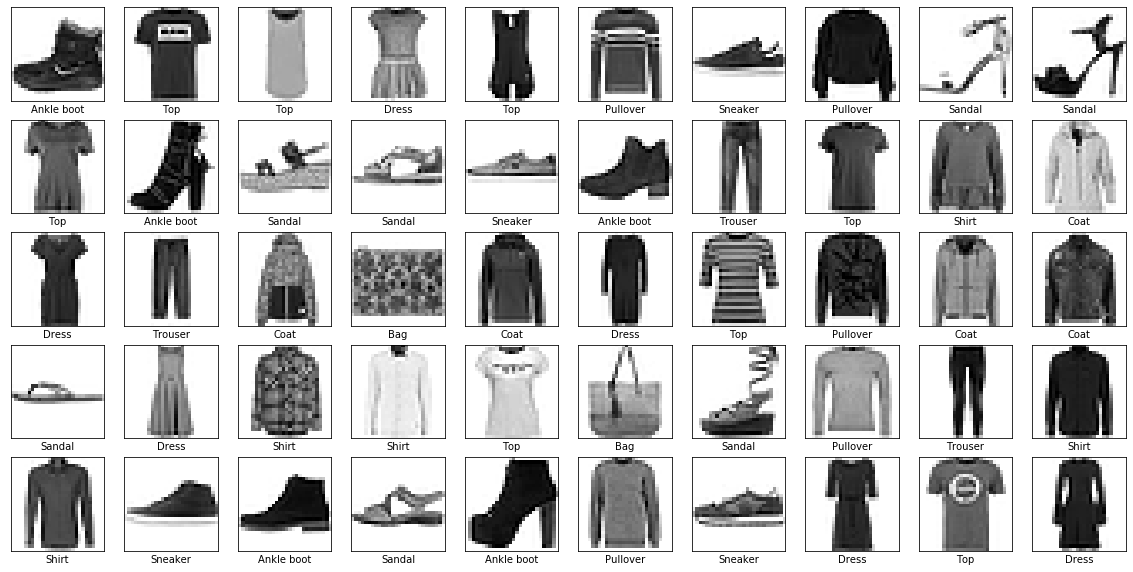

In [20]:
plt.figure(figsize=(20,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#### Neural Network Architecture

Now that we know how the dataset looks like we can start training our first neural network. To do so we need to reshape the input image matrices to have a fourth dimension. The first dimension denotes the number of images, while the second and third one denote the width and height of the image. If we had an image with size 50 x 50 pixels that would mean that we need to reshape it to 60000 x 50 x 50 x 1. The fourth dimension holds the grayscale value at a certain position within the image. If we had an RGB image we would need to make the foruth dimension to be of size 3. 

After reshaping our inputs we need to define the architecture of the neural network. In this case we use the Sequential API of Keras which allows you to add multiple layers to your neural network. The most important part here is the dimension of the input layer to your neurakl network. It is important that you do not specify the batch size because your neural network should handle any batch size during training. The dimensions of the tensors in the following layers is computed automatically. 

The last important step is defining the output layer of our neural network. Since we want to get all the probabilities of the input image belonging to each of the 10 classes we need a vector of size 10 to be the output. As activation function we choose the softmax. It will output a probability distribution based on the K input values from the last hidden layer. The probabilities are proportianal to the exponentials of the input values. As a result, all probabilities are in range of 0 to 1 and they all sum up to 1.

In [21]:
train_images = train_images.reshape((60000,28,28,1))
train_images.shape

(60000, 28, 28, 1)

In [22]:
test_images = test_images.reshape((10000,28,28,1))
test_images.shape

(10000, 28, 28, 1)

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#### Compiling and Training

The final step before starting the training process is specifying the optimizer, the loss function and the metrics that we want to keep track of during training. In our case we picked the Adam optimizer because it is a better version of stochastic gradient descent. Finally, we also want to keep track of the accuracy during training time. We train the network in 4 epochs and with a batch size of 64 tto ensure that the gradient is less noisy.

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(train_images,train_labels, epochs=4, batch_size=64)

Train on 60000 samples
Epoch 1/4
60000/60000 [==============================] - 56s 940us/sample - loss: 0.3872 - accuracy: 0.8599
Epoch 2/4
60000/60000 [==============================] - 56s 930us/sample - loss: 0.2350 - accuracy: 0.9140
Epoch 3/4
60000/60000 [==============================] - 56s 933us/sample - loss: 0.1707 - accuracy: 0.9363
Epoch 4/4
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.1179 - accuracy: 0.9560


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)


Test loss: 0.25432611010074613

Test accuracy: 0.9143


#### Analysis
Now we want to take a look at the performance of our classiifier. For example, we expect that some fashion articles might be harder to recognize or might look very similar to the neural networks compared to certain fashion items. Now we want to use pandas and matplotlib to understand what our neurakl network actually is doing.

To get predictions for our new images we can invoke the predict function of our model. The output will be a tensor with 10 probabilities for each sample. To get the predicted label we can then take the argmax of the 10 probabilities. Finally, we store the predictions in a pandas dataframe.

In [33]:
predicted_labels = model.predict(test_images)
predicted_labels.shape

(10000, 10)

In [34]:
predictions = np.argmax(predicted_labels, axis=1)
predictions.shape

(10000,)

In [35]:
results = pd.DataFrame()
results["predicted_label"] = predictions
results["actual_label"] = test_labels
results["index"] = range(0,10000)
results.head()

,predicted_label,actual_label,index
0,9,9,0
1,2,2,1
2,1,1,2
3,1,1,3
4,6,6,4


Figure shows number of misclassifications per category


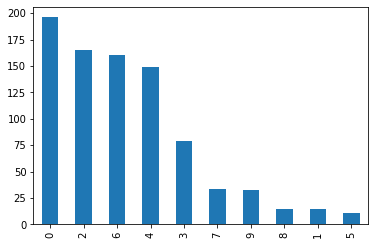

In [36]:
misclassifications = results.loc[results["actual_label"] != results["predicted_label"]]
actual_counts = misclassifications["actual_label"].value_counts()
actual_counts.plot.bar()
print("Figure shows number of misclassifications per category")

Figure shows counts of predicted labels for items that are actually shirts


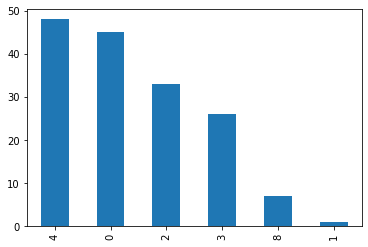

In [37]:
class_shirt = misclassifications[misclassifications["actual_label"] == 6]
class_shirt["predicted_label"].value_counts().plot.bar()
print("Figure shows counts of predicted labels for items that are actually shirts")

What we can see from that data is that label 6 which is the class of shirts is pretty hard to predict. This might be because the shirt looks pretty much like a pullover or t-shirt. This assumption is supported by the data as well because the most misclassifications are caused by tops (0), pullovers(2), shirts(6) and coats(4). Furthermore we can see that dresses, trousers and bags also contribute to misclassifications of shirts but not as much as the already mentioned items.

In [49]:
misclassifications.head(10)

,predicted_label,actual_label,index
12,5,7,12
23,5,9,23
25,6,4,25
42,6,3,42
48,6,2,48
49,6,2,49
66,3,2,66
67,4,3,67
68,7,9,68
74,4,2,74


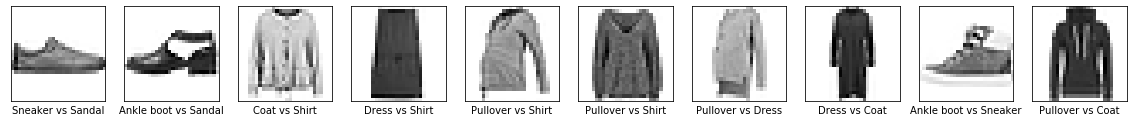

The figure shows images of fashion items that could not be classified correctly. 
The caption below each image indicates the real class vs the predicted class.


In [56]:
plt.figure(figsize=(20,10))
indexes = [12, 23, 25, 42, 48, 49, 66, 67, 68, 74]

count = 1
for i in indexes:
    plt.subplot(1,10,count)
    count += 1
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]] + " vs " + class_names[results.iloc[i]["predicted_label"]])
plt.show()

print("""The figure shows images of fashion items that could not be classified correctly. 
The caption below each image indicates the real class vs the predicted class.""")

## Takeaways
1. One of the first takeaways is that it is important what kind of loss function you are using in this specific problem. You can either choose the sparse_categorical_crossentropy loss or the categorical_crossentropy loss. You may have noticed that we used these two different loss functions for both datasets. The main difference is how we specify and shape our tensors that contain the labels for the specific images. For example, if you use the sparse categorical crossentropy loss the network expects to get a single value at the final output layer to calculate the error. This value is an integer which denotes the different output classes. If you want to use the standard categorical crossentropy loss you need to one-hot-encode the labels. you can do that with the following code snippet.

```python
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
```

2. If you want to test a new neural network architecture or a new deep learning framework it makes sense to use the Keras datasets. This will allow you to concentrate on the architecture and do not care about the data preprocessing step. Since preprocessing of images and might take a lot of time this will allow you to focus on the architecture. You can use the Keras datasets by invoking the following peace of code. Keras provides you with the following datasets: CIFAR10, CIFAR100, IMDB movie review sentiments, Reuters news wirestopics, MNIST, Fashion MNIST and Boston housing prices.

```python
dataset = keras.datasets.<YOUR_DATASET>
(train_input, train_labels), (test_input, test_labels) = dataset.load_data()
```

3. It makes sense to take a look at the output of the artificial neural network. Especially if your neural network does not perform very well this might help you to indicate which part of the network you might want to improve. In our case we can see that the digits in the Number MNIST dataset are simply unreadable or even look more like another number than the actual digit. For the Fashion MNIST dataset we can see that some items (e.g. Ankle Boot) look like another one (e.g. Sandal) because they share some common characteristic. It would be interesting to see if a bigger network can handle different types of fashion items in a more efficient way?!